# <span style="color:blue">  Esercitazione 2</span>

## Esercizio 2.1

Nel seguente esercizio si calcola il valore dell'integrale noto
$$ I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x)\, dx = 1 $$
attraverso tecniche MC. In particolare, si prendono in considerazione due metodi differenti:
- generando numeri pseudo-casuali sull'intervallo $[0,1)$. L'integrale è quindi stimato come
  $$ I = \frac{b-a}{N} \sum_{i=1}^N f(x_i) = (b-a)\langle f(x) \rangle_{[a,b]} $$
  detti $x_i$ i numeri generati secondo $\mathcal{U}[0,1)$;
- con il metodo dell'importance sampling, stimando l'integrale generando i numeri pseudo-casuali $x_i$ secondo una distribuzione $p(x)$ e calcolando le quantità $\langle g(x) \rangle_{[a,b]}$, dove $ g(x) = \frac{f(x)}{p(x)} $.

Per il metodo dell'importance sampling si è utilizzata la funzione di densità di probabilità (normalizzata su $[0,1]$)
$$ p(x) = -2x+2 $$
la cui cumulativa e relativa inversa sono
$$ P(x) = -x^2+2x \qquad P^{-1}(x) = 1-\sqrt{1-x} $$

<center><img src="Importance_sampling.png" alt="Descrizione_immagine"></center>

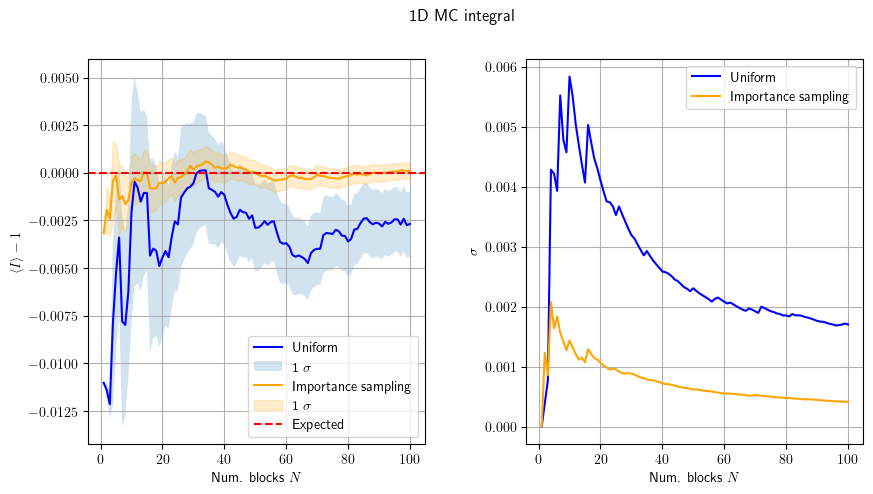

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati
data1 = np.loadtxt("Results_ex_2_1_1.out", skiprows=1) # Metodo della media
block1 = data1[:,0] # Numero blocco
ave1 = data1[:,1] # Media cumulativa a blocchi
err1 = data1[:,2] # Incertezza statistica
data2 = np.loadtxt("Results_ex_2_1_2.out", skiprows=1) # Importance Sampling
block2 = data2[:,0] # Numero blocco
ave2 = data2[:,1] # Media cumulativa a blocchi
err2 = data2[:,2] # Incertezza statistica

# Plot grafico
fig = plt.figure(figsize=(10, 5))
fig.suptitle('1D MC integral')
plt.rcParams['text.usetex'] = True

# Grafico di sinistra: plot valore integrale con errore
plt.subplot(1,2,1)
# Metodo della media
plt.plot(block1, ave1, color='blue', label='Uniform')
plt.fill_between(block1, ave1-err1, ave1+err1, alpha=0.2, label='1 $\\sigma$') 
# Importance Sampling
plt.plot(block2, ave2, color='orange', label='Importance sampling') 
plt.fill_between(block2, ave2-err2, ave2+err2, color='orange', alpha=0.2, label='1 $\\sigma$')
# Valore atteso
plt.axhline(0, color='red', linestyle='--', label='Expected') 

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\langle I \\rangle - 1$')
plt.legend(loc='lower right')
plt.grid(True)


# Grafico di destra: plot incertezze
plt.subplot(1,2,2)
plt.plot(block1, err1, color='blue', label='Uniform') # Metodo della media
plt.plot(block2, err2, color='orange', label='Importance sampling') # Importance Sampling

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\sigma$')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

## Esercizio 2.2

Nel seguente esercizio si simulano dei random walk 3D sia su reticolo che nel continuo. 

Nel primo caso, il random walk è simulato per step di lunghezza $a=1$. Ad ogni step una particella può muoversi arbitrariamente in una delle tre direzioni del reticolo e in uno dei due possibili versi. Per simulare questo cammino, si genera una coppia di numeri $(d,v)$, dove $d \in \text{int}\big[\mathcal{U}[0,3)\big]$ e $v \in \text{int}\big[\mathcal{U}[0,2)\big]$, di modo che ad ogni intero generato corrisponda una scelta della direzione e del verso del moto.

Nel caso continuo, la particella si muove sempre di step $a=1$ in una direzione qualunque dello spazio. Questa è ottenuta campionando uniformemente gli angoli $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$. Per via delle condizioni sullo jacobiano in coordinate sferiche, gli angoli vengono campionati a partire dalle distribuzioni
\begin{align}
\theta &= \arccos(1-2r) \quad \text{con} \quad r \in \mathcal{U}[0,1) \\
\phi &\in \mathcal{U}[0,2\pi)
\end{align}
La posizione della particella allo step successivo è data da
\begin{align}
x &= r\sin(\theta)\cos(\phi) \\
y &= r\sin(\theta)\sin(\phi) \\
z &= r\cos(\theta)
\end{align}

Si simulano $10^4$ cammini aleatori e si calcola la radice della distanza quadratica media $\sqrt{\langle |\vec{r}_N|^2 \rangle}_{RW}$ dal punto di origine del cammino stesso in funzione del numero di step eseguiti dalla particella. Le medie e le relative incertezze vengono calcolate con la media a blocchi.

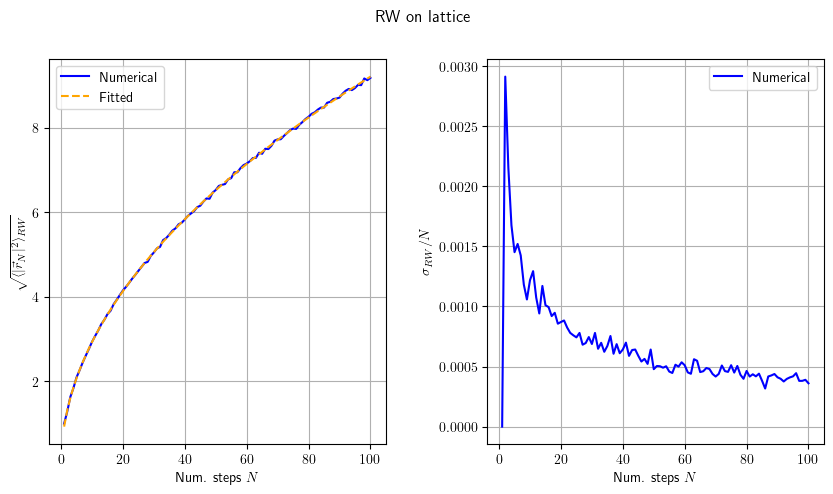

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica dati
data = np.loadtxt("Results_ex_2_2_1.out")
step = data[:,0] # Numero step
ave = data[:,1] # Distanza quadratica media
err = data[:,2] # Incertezza statistica

# Definizione funzione di fit
def fit_function(x, a, b):
    return a * x ** b

# Fit dati numerici
params, covariance = curve_fit(fit_function, step, ave, p0=[1.0, 0.5])
x_fit = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
y_fit = fit_function(x_fit, params[0], params[1])
    
# Plot grafico
fig = plt.figure(figsize=(10, 5))
fig.suptitle("RW on lattice")
plt.rcParams['text.usetex'] = True

# Grafico di sinistra: distanza qudratica media in funzione del numero di step
plt.subplot(1,2,1)
plt.plot(step, ave, color='blue', label='Numerical')
plt.plot(x_fit, y_fit, color='orange', linestyle='dashed', label='Fitted')

plt.xlabel('Num. steps $N$')
plt.ylabel('$\\sqrt{\\langle|\\vec{r}_N|^2\\rangle_{RW}}$')
plt.grid(True)
plt.legend()

# Grafico di destra: incertezza statistica
plt.subplot(1,2,2)
plt.plot(step, err/step, color='blue', label='Numerical')

plt.xlabel('Num. steps $N$')
plt.ylabel('$\\sigma_{RW}/N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [9]:
print("Parametro fit", params[1], "+/-", np.sqrt(covariance[1,1]))

Parametro fit 0.4978251623736978 +/- 0.0008466374077832038


La radice della distanza quadratica media è stata fittata con una funzione del tipo $f(x)=ax^{\alpha}$. La legge di potenza determinata dal fit è
$$ \alpha = 0.49783 \pm 0.00085 $$
Questo è in accordo con quanto previsto dalla soluzione dell'equazione di diffusione per cui $\sigma^2\propto N$.

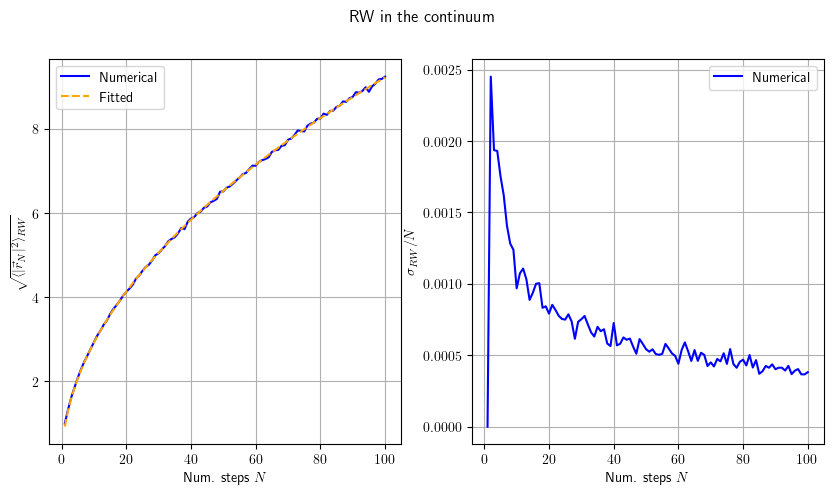

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica dati
data = np.loadtxt("Results_ex_2_2_2.out")
step = data[:,0] # Numero step
ave = data[:,1] # Distanza quadratica media
err = data[:,2] # Incertezza statistica

# Definizione funzione di fit
def fit_function(x, a, b):
    return a * x ** b

# Fit dati numerici
params, covariance = curve_fit(fit_function, step, ave, p0=[1.0, 0.5])
x_fit = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
y_fit = fit_function(x_fit, params[0], params[1])
    
# Plot grafico
fig = plt.figure(figsize=(10, 5))
fig.suptitle("RW in the continuum")
plt.rcParams['text.usetex'] = True

# Grafico di sinistra: distanza qudratica media in funzione del numero di step
plt.subplot(1,2,1)
plt.plot(step, ave, color='blue', label='Numerical')
plt.plot(x_fit, y_fit, color='orange', linestyle='dashed', label='Fitted')

plt.xlabel('Num. steps $N$')
plt.ylabel('$\\sqrt{\\langle|\\vec{r}_N|^2\\rangle_{RW}}$')
plt.grid(True)
plt.legend()

# Grafico di destra: incertezza statistica
plt.subplot(1,2,2)
plt.plot(step, err/step, color='blue', label='Numerical')

plt.xlabel('Num. steps $N$')
plt.ylabel('$\\sigma_{RW}/N$')
plt.legend()
plt.grid(True)

In [11]:
print("Parametro fit", params[1], "+/-", np.sqrt(covariance[1,1]))

Parametro fit 0.4990355392567528 +/- 0.0009473050168627924


La radice della distanza quadratica media è stata fittata con una funzione del tipo $f(x)=ax^{\alpha}$. La legge di potenza determinata dal fit è
$$ \alpha = 0.49904 \pm 0.00095 $$
Questo è in accordo con quanto previsto dalla soluzione dell'equazione di diffusione per cui $\sigma^2\propto N$.